In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
visitors = pd.read_csv('AustralianVisitors.csv')
y = visitors['No of Visitors']


In [2]:
alpha = 0.1
smoothed_manual = [y[0]]

smoothed_manual
len(y)

312

In [3]:
for i in range(len(visitors)-1):
    smoothed_manual.append( alpha * y[i] + (1- alpha)*smoothed_manual[i]  )

In [4]:
len(smoothed_manual)

312

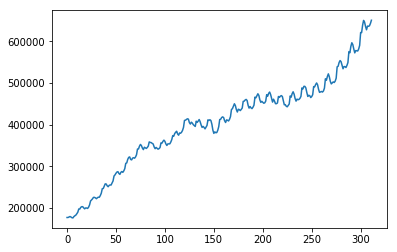

In [5]:
fig = plt.figure()
plt.plot(smoothed_manual, label = "manual smoothed curve, alpha = 0.1")

In [6]:
smoothed_manual2 = [ 1/3 * (y[0]+y[1]+y[2]) ]
smoothed_manual2 = [y[0]]


In [7]:
for i in range(len(visitors)):
    smoothed_manual2.append( alpha * y[i] + (1- alpha)*smoothed_manual[i]  )


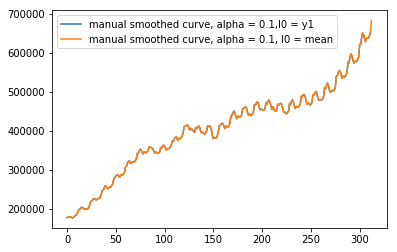

In [8]:
fig = plt.figure()
plt.plot(smoothed_manual, label = "manual smoothed curve, alpha = 0.1,l0 = y1")
plt.plot(smoothed_manual2,label = "manual smoothed curve, alpha = 0.1, l0 = mean")
plt.legend(loc="upper left")

In [9]:
smoothed1 = y.ewm(alpha=0.05, adjust=False).mean()
smoothed2 = y.ewm(alpha=0.1, adjust=False).mean()
smoothed3 = y.ewm(alpha=0.3, adjust=False).mean()
smoothed4 = y.ewm(alpha=0.7, adjust=False).mean()
#smoothed5 = y.ewm(alpha=0, adjust=False).mean()
smoothed6 = y.ewm(alpha=1, adjust=False).mean()


len(smoothed2)

312

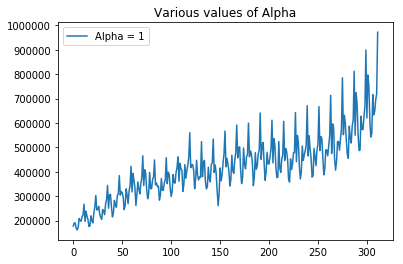

In [10]:
#plt.plot(smoothed1, label = "Alpha = 0.05")
#plt.plot(smoothed2, label = "Alpha = 0.1")
#plt.plot(smoothed_manual, label = "Alpha = 0.1")
#plt.plot(smoothed_manual-smoothed2, label = "Alpha = 0.1")

#plt.plot(smoothed5, label = "Alpha = 0.1")
plt.plot(smoothed6, label = "Alpha = 1")


#plt.plot(smoothed3, label = "Alpha = 0.3")
#plt.plot(smoothed4, label = "Alpha = 0.7")
plt.title("Various values of Alpha")
plt.legend(loc="upper left")

plt.show(block=False)

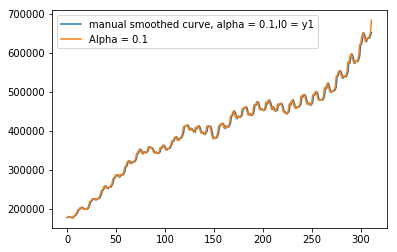

In [11]:
fig = plt.figure()
plt.plot(smoothed_manual, label = "manual smoothed curve, alpha = 0.1,l0 = y1")
plt.plot(smoothed2, label = "Alpha = 0.1")
plt.legend(loc="upper left")

In [12]:
def sse(x,y):
    return np.sum(np.power(x-y,2))
    

In [13]:
sse_one = []
alphas = np.arange(0.01,1,0.01)

In [14]:
for i in alphas:
    smoothed = y.ewm(alpha = i,adjust = False).mean()
    sse_one.append( sse(smoothed[:-1], y.values[1:] ))
    
smoothed

0      177400.000000
1      190468.000000
2      189212.680000
3      168212.126800
4      161468.121268
5      172092.681213
6      207937.926812
7      199386.379268
8      197419.863793
9      215814.198638
10     223819.141986
11     266370.191420
12     196802.701914
13     237786.027019
14     217999.860270
15     203941.998603
16     175487.419986
17     176885.874200
18     218875.858742
19     199297.758587
20     190092.977586
21     228907.929776
22     254739.079298
23     301923.390793
24     243391.233908
25     245478.912339
26     257775.789123
27     226614.757891
28     213532.147579
29     204689.321476
           ...      
282    585483.566997
283    539266.835670
284    517717.668357
285    587396.176684
286    610169.961767
287    810179.699618
288    552502.796996
289    721988.027970
290    676756.880280
291    553643.568803
292    487369.435688
293    488983.694357
294    626114.836944
295    574620.148369
296    571927.201484
297    624667.272015
298    668556

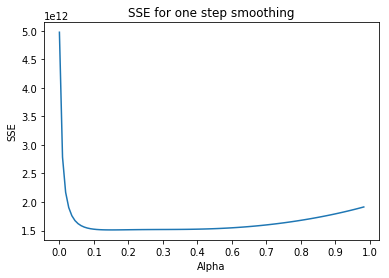

In [15]:
plt.figure()
plt.plot(sse_one)
plt.title("SSE for one step smoothing")
plt.ylabel("SSE")
plt.xlabel("Alpha")
plt.xticks(np.linspace(0, 100, 10), ["{0:1.1f}".format(x)
for x in np.linspace(0,1,10) ])
plt.show(block=False)

In [16]:
optimal_alpha_one = alphas[ np.argmin(sse_one) ]
print("Optimal Alpha for 1-step forecast {0}".format(optimal_alpha_one))

Optimal Alpha for 1-step forecast 0.18000000000000002


In [17]:
sse_two = []
alphas = np.arange(0.01,1,0.01)
for i in alphas:
    smoothed = y.ewm(alpha = i, adjust=False).mean()
    sse_two.append( sse(smoothed[:-2], y.values[2:]) )

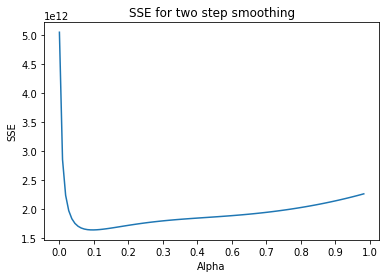

Optimal Alpha for 2-step forecast 0.12


In [18]:
plt.figure()
plt.plot(sse_two)
plt.title("SSE for two step smoothing")
plt.ylabel("SSE")
plt.xlabel("Alpha")
plt.xticks(np.linspace(0, 100, 10), ["{0:1.1f}".format(x)
for x in np.linspace(0,1,10) ])
plt.show(block=False)
optimal_alpha_two = alphas[np.argmin(sse_two)]
print("Optimal Alpha for 2-step forecast {0}".format(optimal_alpha_two))

In [31]:
alpha = 0.1
beta = 0.1
l = [y[0]]
b = [y[1] - y[0]]
Y = y.tolist()

holtsmoothed_manual = [] 
for i in range(len(y)):
    #if i == len(Y):
        #Y.append(l[-1] + b[-1])
    #print(i)
    l.append(alpha * Y[i] + (1 - alpha) * (l[i] + b[i]))
    b.append(beta * (l[i+1] - l[i]) + (1 - beta) * b[i])
    holtsmoothed_manual.append(l[i+1])


In [39]:
len(y)

312

In [40]:
len(holtsmoothed_manual)

312

In [33]:
alpha = 0.1
beta = 0.1
l = [y[0]]
b = [y[1] - y[0]]
Y = y.tolist()

holtsforecast_manual = []

for i in range(len(y)+12):
    if i == len(Y):
        Y.append(l[-1] + b[-1])

    l.append(alpha * Y[i] + (1 - alpha) * (l[i] + b[i]))
    b.append(beta * (l[i+1] - l[i]) + (1 - beta) * b[i])

    holtsforecast_manual.append(l[i] + b[i])

In [41]:
len(holtsforecast_manual)

324

Text(0.5, 1.0, "Holt's linear smoothing")

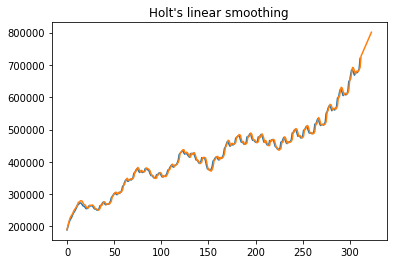

In [36]:
fig = plt.figure()
plt.plot(holtsmoothed_manual, label = "holt smoothed curve, alpha,beta = 0.1")
plt.plot(holtsforecast_manual)
#plt.plot(y, label="original data")
plt.title("Holt's linear smoothing")